Градиентный спуск и Momentum своими руками.

Используем библиотеку sympy для того, чтобы вычислять производные различных функций (при помощи `sp.diff`).

Ниже реализован метод одномерного градиентного спуска для нахождения минимума функции `f(x)`.

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

x = sp.Symbol('x')

При помощи градиентного спуска найдем минимум функции
$f(x) = x^3 - 3x^2 + 4$.

In [ ]:
def f(x):
  return x**3 - 3*x**2 + 4

In [ ]:
def gradient_descent(x_start, learning_rate, epsilon, num_iterations):
    x_curr = x_start
    df_x = sp.diff(f(x)) # производная

    trace = []
    trace.append(x_curr)

    epochs = 0

    for i in range(num_iterations):
      epochs += 1
      x_new = x_curr - learning_rate * df_x.subs(x, x_curr)
      trace.append(x_new)

      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace, epochs

      x_curr = x_new

    return x_curr, trace, epochs

Визуализируем процесс поиска минимума (красные точки) и найденный минимум (зеленая точка).

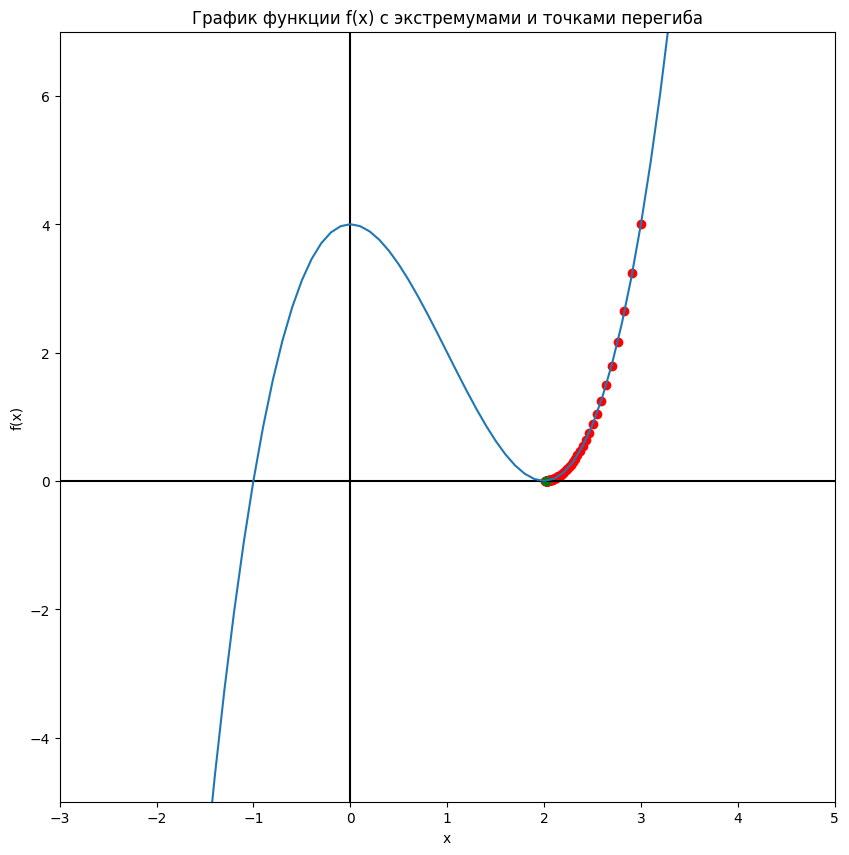

In [ ]:
xmin, trace, num_epochs = gradient_descent(3, 0.01, 0.001, 100)

x_values = [x for x in np.arange(-5, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show()

In [ ]:
print(f"Минимум функции достигается при x = {xmin}")
print(f"Минимум функции f(x) = {f(xmin)}")
print(f"Число итераций = {num_epochs}")

Минимум функции достигается при x = 2.01599304738014
Минимум функции f(x) = 0.000771423356217937
Число итераций = 61


Модифицируем функцию, осуществляющую метод градиентного спуска:

* добавим опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции)

* добавим в возвращаемые значения метода число произведенных методом итераций

In [ ]:
def gradient_descent_modified(x_start, learning_rate, epsilon, num_iterations, delta=1e-3):
    x_curr = x_start
    df_x = sp.diff(f(x))

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
        derivative = df_x.subs(x, x_curr)

        if abs(derivative) < delta:
            return x_curr, trace, i

        x_new = x_curr - learning_rate * derivative
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace, i

        x_curr = x_new

    return x_curr, trace, num_iterations

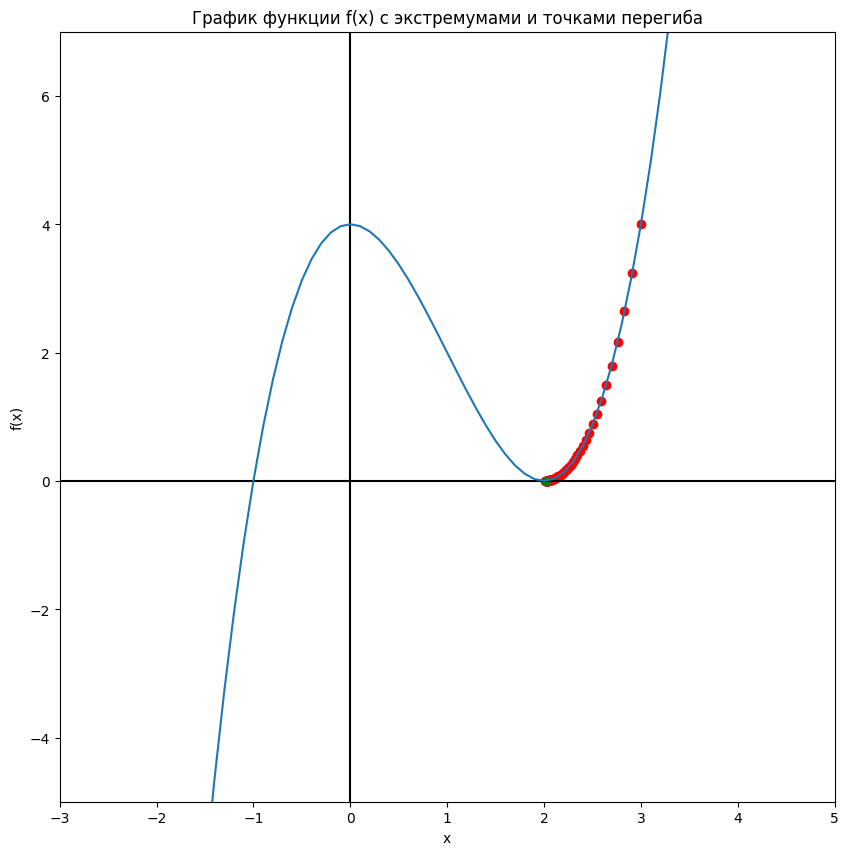

Число итераций: 60


In [ ]:
xmin, trace, num_iter = gradient_descent_modified(3, 0.01, 0.001, 100)

x_values = [x for x in np.arange(-3, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))
plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')
plt.plot(x_values, f_values)
plt.xlim([-3, 5])
plt.ylim([-5, 7])
plt.title('График функции f(x) c экстремумами и точками перегиба')
plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')
plt.show()

print("Число итераций:", num_iter)

In [ ]:
def f(x):
    return (x + 5)*(x + 2)*(x - 3)*(x - 4)

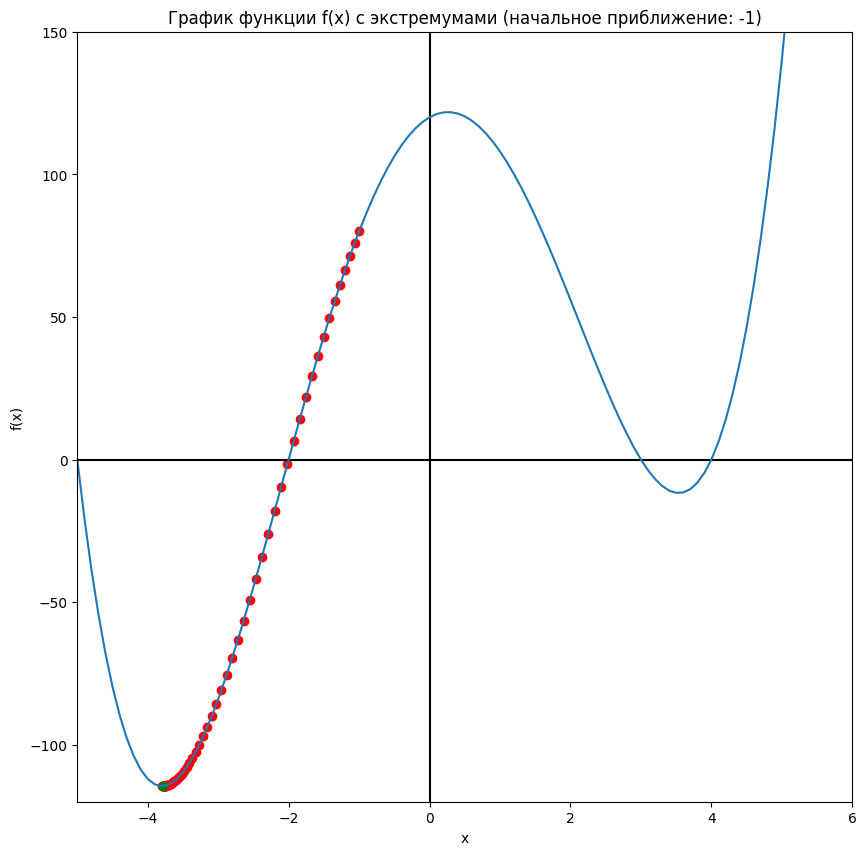

Начальное приближение: -1
Минимум функции достигается при x = -3.78956142638505
Минимум функции f(x) = -114.562924984044
Число итераций: 64



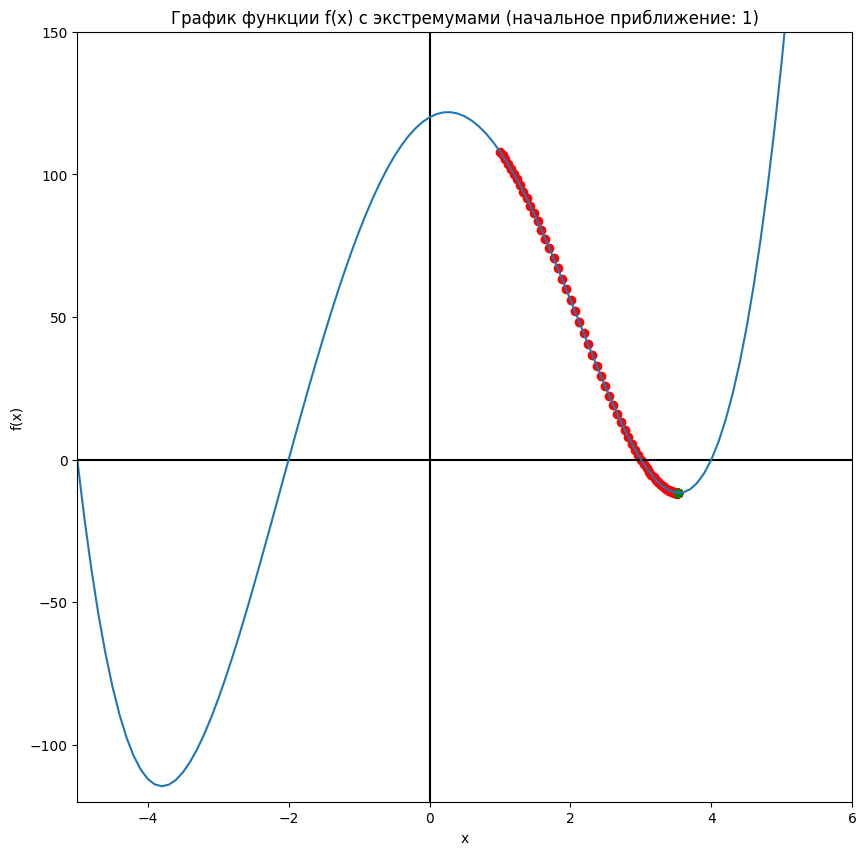

Начальное приближение: 1
Минимум функции достигается при x = 3.52687332199380
Минимум функции f(x) = -11.7477032461723
Число итераций: 80



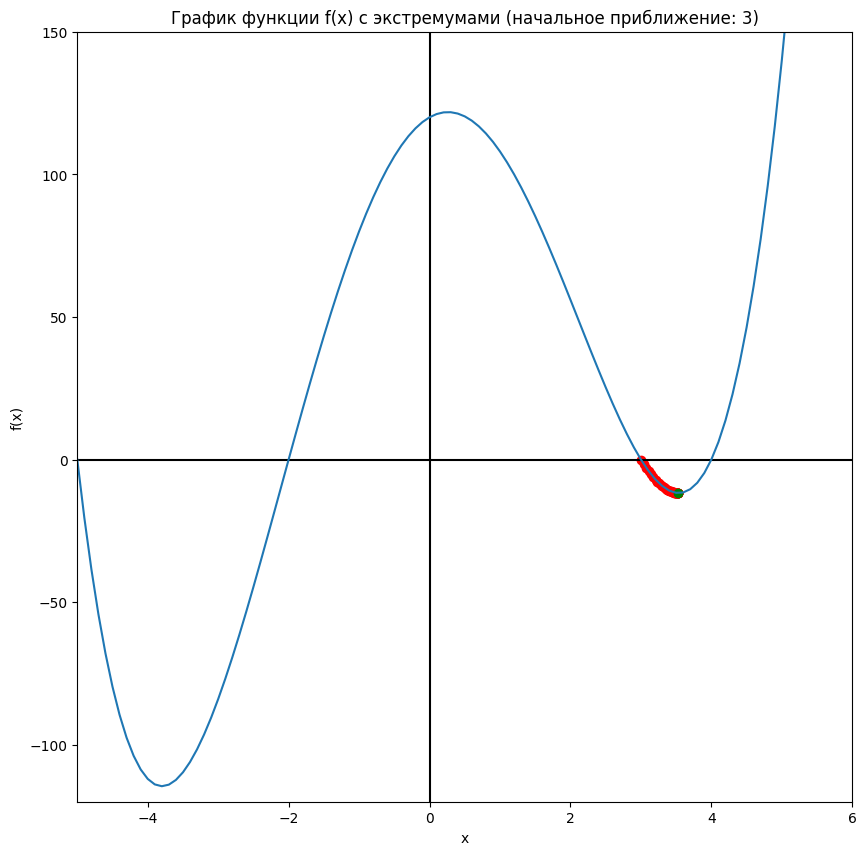

Начальное приближение: 3
Минимум функции достигается при x = 3.52677917605698
Минимум функции f(x) = -11.7476114674044
Число итераций: 42



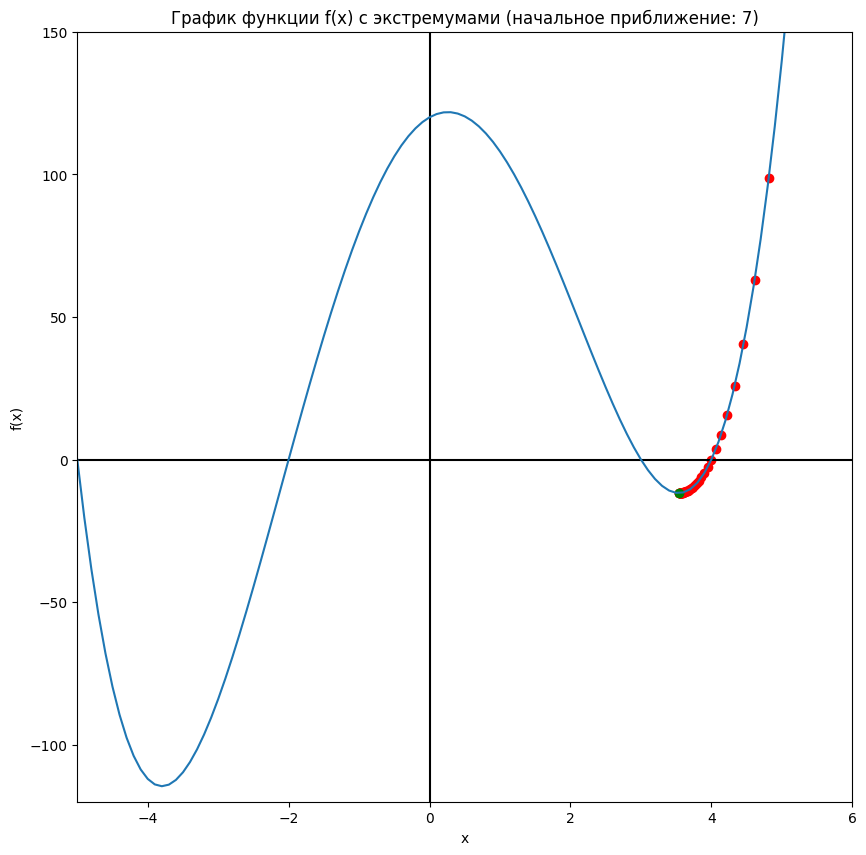

Начальное приближение: 7
Минимум функции достигается при x = 3.54692789492027
Минимум функции f(x) = -11.7478923694664
Число итераций: 47



In [ ]:
learning_rate = 0.001
epsilon = 0.001
num_iterations = 100
delta = 1e-3

initial_guesses = [-1, 1, 3, 7]  # Варианты ответа

for guess in initial_guesses:
    xmin, trace, num_iter = gradient_descent_modified(guess, learning_rate, epsilon, num_iterations, delta)

    # Построение графика
    x_values = [x for x in np.arange(-5, 6, 0.1)]
    f_values = [f(x) for x in x_values]

    plt.figure(figsize=(10,10))
    plt.axvline(x=0, c='black')
    plt.axhline(y=0, c='black')
    plt.plot(x_values, f_values)
    plt.xlim([-5, 6])
    plt.ylim([-120, 150])
    plt.title(f'График функции f(x) c экстремумами (начальное приближение: {guess})')
    plt.xlabel('x')
    plt.ylabel('f(x)')

    trace_values = [f(x) for x in trace]
    plt.scatter(trace, trace_values, c='red')  # Красные точки (итерации градиентного спуска)
    plt.scatter([xmin], [f(xmin)], c='green')  # Зеленая точка (минимум)

    plt.show()

    print(f"Начальное приближение: {guess}")
    print(f"Минимум функции достигается при x = {xmin}")
    print(f"Минимум функции f(x) = {f(xmin)}")
    print(f"Число итераций: {num_iter}\n")

Реализуем модификацию метода градиентного спуска - Momentum:

$$x_{new} = x_{old} - h_{new},$$
$$h_{new} = \alpha\cdot h_{old} + \eta\cdot f'(x_{old})$$


In [ ]:
def momentum_method(x_start, learning_rate, epsilon, num_iterations, momentum, delta=0.01):
    x_curr = x_start
    df_x = sp.diff(f(x))

    trace = []
    trace.append(x_curr)

    h_curr = 0
    h_trace = []
    h_trace.append(h_curr)

    for i in range(1, num_iterations):
        h_new = momentum * h_curr + learning_rate * df_x.subs(x, x_curr)
        x_new = x_curr - h_new

        trace.append(x_new)
        h_trace.append(h_new)

        if (abs(x_new - x_curr) < epsilon) or (abs(df_x.subs(x, x_new)) < delta):
            return x_curr, trace, i

        x_curr = x_new
        h_curr = h_new

    return x_curr, trace, num_iterations

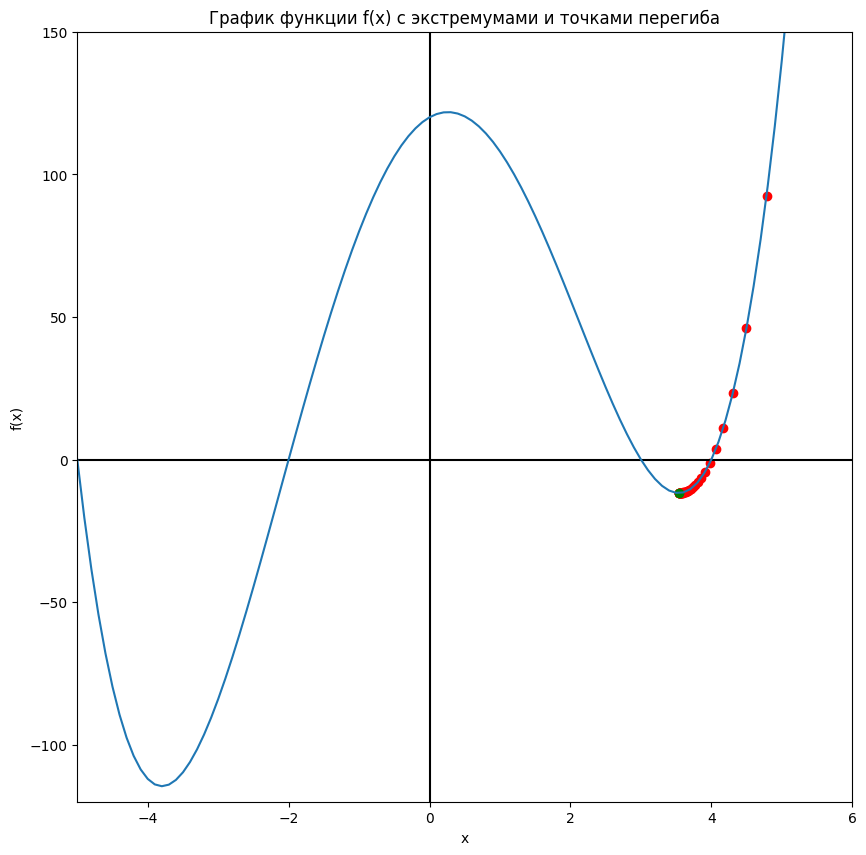

Значение найденной точки минимума: 3.54


In [ ]:
xmin, trace, num_iter = momentum_method(7, 0.001, 0.001, 100, momentum=0.2)

x_values = [x for x in np.arange(-5, 6, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.plot(x_values, f_values)
plt.xlim([-5, 6])
plt.ylim([-120, 150])
plt.title('График функции f(x) c экстремумами и точками перегиба')
plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin], [f(xmin)], c='green')

plt.show()

print(f"Значение найденной точки минимума: {round(float(xmin), 2)}")

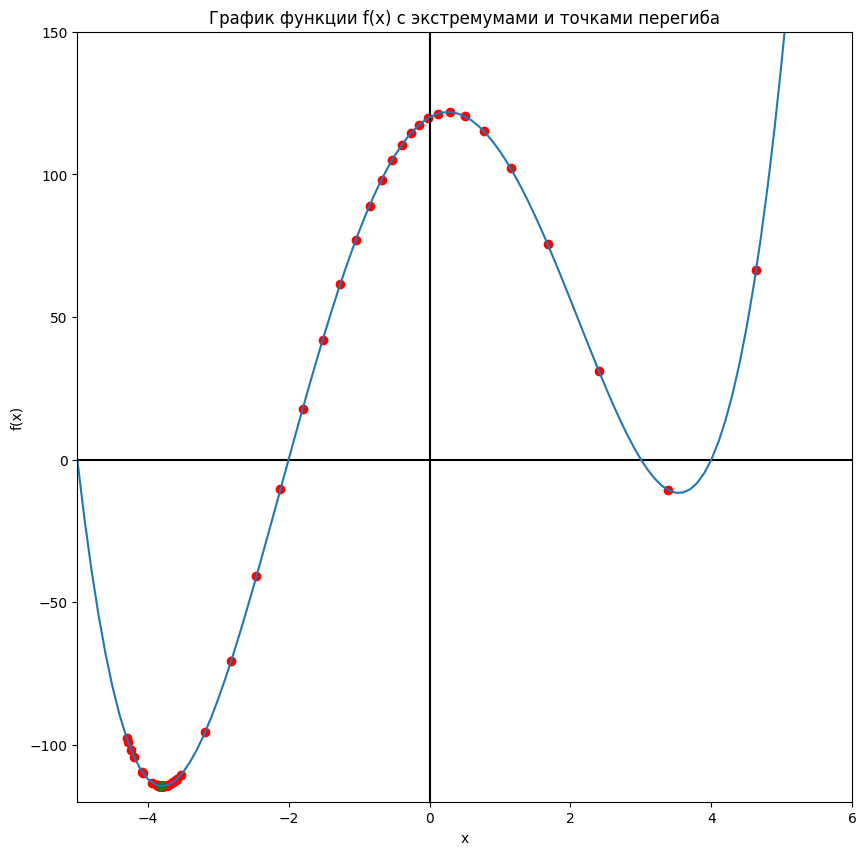

Значение найденной точки минимума: -3.81


In [ ]:
xmin, trace, num_iter = momentum_method(7, 0.001, 0.001, 100, momentum=0.8)

x_values = [x for x in np.arange(-5, 6, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.plot(x_values, f_values)
plt.xlim([-5, 6])
plt.ylim([-120, 150])
plt.title('График функции f(x) c экстремумами и точками перегиба')
plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin], [f(xmin)], c='green')

plt.show()

print(f"Значение найденной точки минимума: {round(float(xmin), 2)}")